# ERA5 Precipitation Month-hour climatology

Replicating [this tweet](https://twitter.com/FabClimate/status/1524071755215777792)

In [1]:
import xarray as xr

In [12]:
ds = xr.open_zarr("gs://pangeo-era5/reanalysis/spatial-analysis", chunks={"time": 48}, consolidated=True)
ds

/Users/dcherian/mambaforge/envs/coiled/lib/python3.11/site-packages/xarray/core/dataset.py:265: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 48. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


<xarray.Dataset>
Dimensions:    (time: 350640, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables: (12/17)
    asn        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    e          (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    ptype      (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    ...         ...
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    tcrw       (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    tsn        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-20 05:15:01 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [10]:
import flox.xarray

In [17]:
import coiled

cluster = coiled.Cluster(account="dask-gcp", n_workers=2, backend_options={"region_name": "us-central1"})
cluster.adapt(minimum=2, maximum=100)
client = cluster.get_client()

Output()

Output()

2023-07-08 21:41:31,691 - distributed.deploy.adaptive - INFO - Adaptive scaling started: minimum=2 maximum=100


In [22]:
clim = flox.xarray.xarray_reduce(
    ds.tp,
    ds.time.dt.month,
    ds.time.dt.hour,
    func="mean",
    method="cohorts",
)
clim.load()

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440, month: 12, hour: 24)>
array([[[[2.07941612e-05, 2.01564035e-05, 1.96288856e-05, ...,
          1.95893244e-05, 1.97890913e-05, 2.04160006e-05],
         [1.69998784e-05, 1.72077580e-05, 1.71331994e-05, ...,
          1.71784341e-05, 1.80234329e-05, 1.80392180e-05],
         [1.96048059e-05, 1.94400855e-05, 1.91816216e-05, ...,
          1.92784137e-05, 1.94329023e-05, 1.93268334e-05],
         ...,
         [3.34847391e-05, 3.40159386e-05, 3.39047692e-05, ...,
          3.11168878e-05, 3.06978582e-05, 3.14391400e-05],
         [2.26849625e-05, 2.33104802e-05, 2.28126373e-05, ...,
          2.16009194e-05, 2.17679481e-05, 2.23466286e-05],
         [1.23511418e-04, 1.23420788e-04, 1.48960651e-04, ...,
          1.47850878e-04, 1.48698164e-04, 1.49078027e-04]],

        [[2.07941612e-05, 2.01564035e-05, 1.96288856e-05, ...,
          1.95893244e-05, 1.97890913e-05, 2.04160006e-05],
         [1.69998784e-05, 1.72077580e-05, 1.71331994e-05, ...,
          1.71784341e-05, 1.80234329e-05, 1.80392180e-05],
         [1.96048059e-05, 1.94400855e-05, 1.91816216e-05, ...,
          1.92784137e-05, 1.94329023e-05, 1.93268334e-05],
...
          9.56173881e-06, 9.62763716e-06, 9.70793553e-06],
         [6.88882255e-06, 6.89096441e-06, 6.85155374e-06, ...,
          6.34306753e-06, 6.48133755e-06, 6.57497912e-06],
         [1.06676329e-04, 1.32270769e-04, 1.32181187e-04, ...,
          1.32183253e-04, 1.32329442e-04, 1.32319139e-04]],

        [[4.95949507e-06, 4.93786456e-06, 4.91620176e-06, ...,
          4.86281670e-06, 5.03888759e-06, 5.10785048e-06],
         [6.98683152e-06, 7.05459524e-06, 7.15063879e-06, ...,
          6.75415231e-06, 6.90438401e-06, 6.92804770e-06],
         [1.00693451e-05, 9.94267975e-06, 9.84905182e-06, ...,
          9.81816174e-06, 1.01002470e-05, 1.02412860e-05],
         ...,
         [9.90146145e-06, 9.95191749e-06, 9.92103651e-06, ...,
          9.56173881e-06, 9.62763716e-06, 9.70793553e-06],
         [6.88882255e-06, 6.89096441e-06, 6.85155374e-06, ...,
          6.34306753e-06, 6.48133755e-06, 6.57497912e-06],
         [1.06676329e-04, 1.32270769e-04, 1.32181187e-04, ...,
          1.32183253e-04, 1.32329442e-04, 1.32319139e-04]]]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
Attributes:
    long_name:  Total precipitation
    units:      m

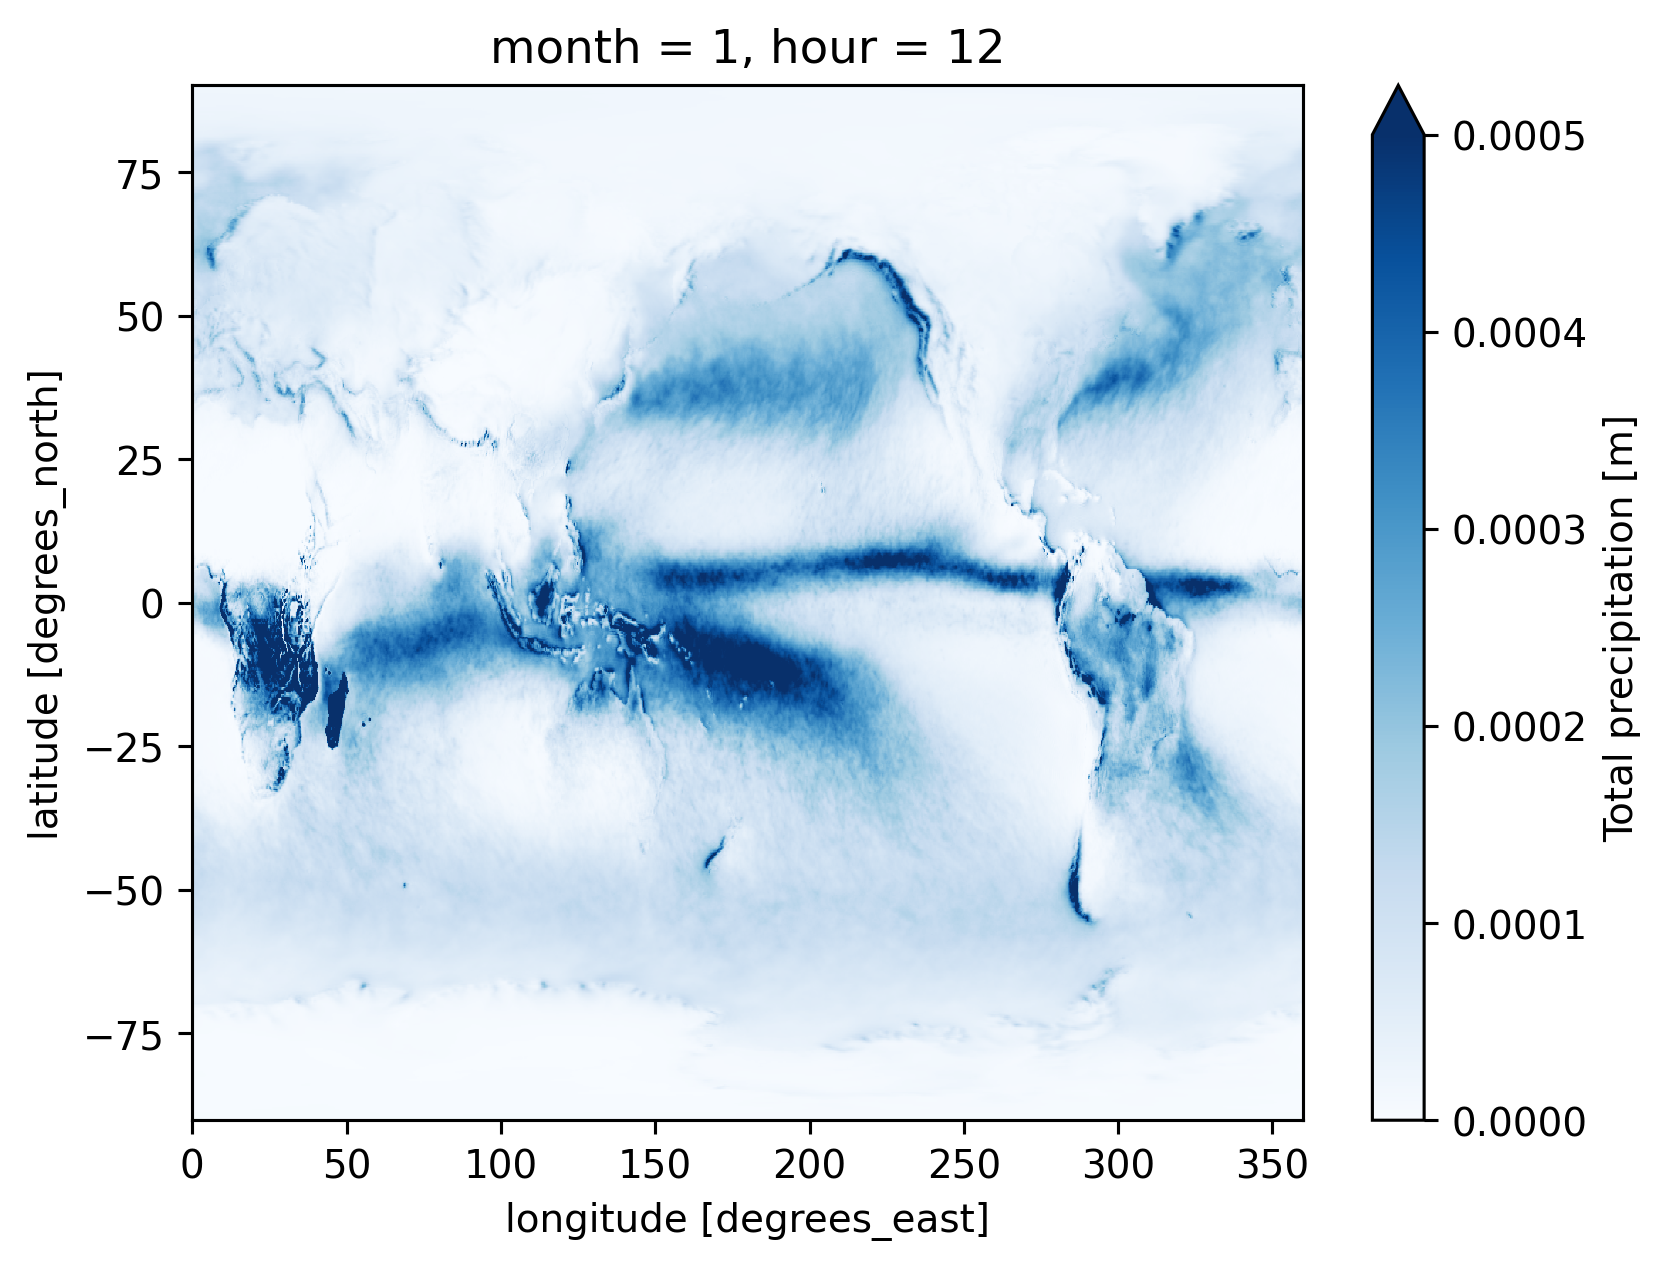

In [43]:
import hvplot.xarray

clim.stack(monthhour=["month", "hour"],  create_index=False).isel(monthhour=12).plot(cmap="Blues", vmin=0, vmax=0.0005)

In [59]:
clim.to_dataset().to_zarr("era5-precip-clim.zarr", mode="w")

In [9]:
clim = xr.open_zarr("era5-precip-clim.zarr", chunks={"latitude": -1, "longitude": -1, "month": 1, "hour": 1})
clim

<xarray.Dataset>
Dimensions:    (hour: 24, latitude: 721, longitude: 1440, month: 12)
Coordinates:
  * hour       (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp         (latitude, longitude, month, hour) float32 dask.array<chunksize=(721, 1440, 1, 1), meta=np.ndarray>

In [2]:
import distributed

In [3]:
client = distributed.Client()

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55279,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:55374,Total threads: 2
Dashboard: http://127.0.0.1:55379/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:55284,


In [17]:
import geogif

task = geogif.dgif(
    clim.tp.stack(time=("month", "hour")).transpose("time", ...),
    date_format=False,
    cmap="Blues",
    vmin=0,
    vmax=0.01,
    fps=5,
)

In [ ]:
import dask

comp = dask.compute(task)